# Problem Statement

### 1.Check eligibility of the Customer given the inputs described above.(Classification)

# Logistic Regression

# Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from PM8wd import preprocessing
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Training Dataset

# Read the Dataset

In [2]:
df = pd.read_csv('training_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Drop Unnecessary Column

In [3]:
df.drop(['Loan_ID',],axis=1,inplace=True)

# Handling Missing Value Treatment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [5]:
df.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(),inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [7]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis(EDA)

In [8]:
cat = []
con = []
for i in df.columns:
    if(df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
df_cat = df[cat]
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [10]:
df_con = df[con]
df_con.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00000,0.0,146.412162,360.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0
2,3000.00000,0.0,66.000000,360.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0


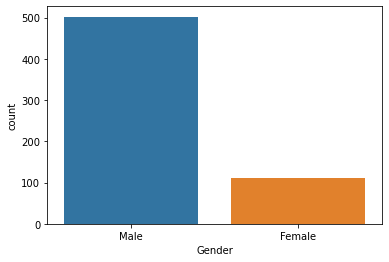

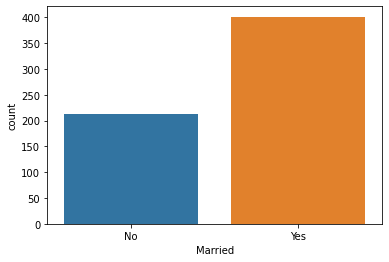

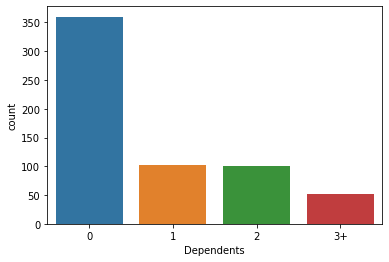

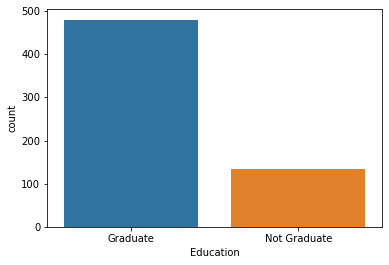

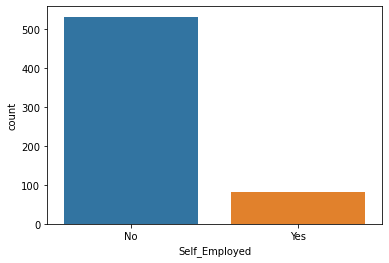

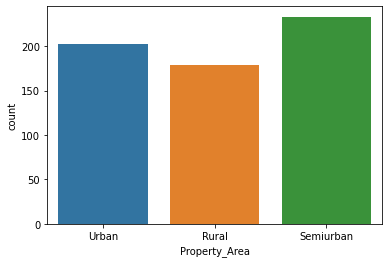

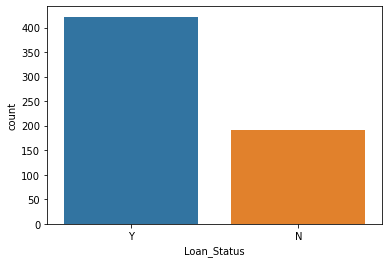

In [11]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.show()

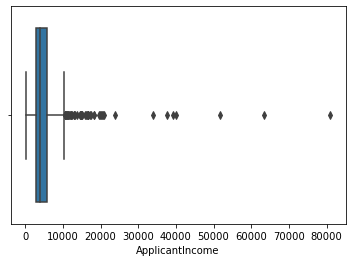

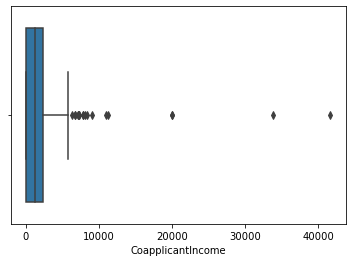

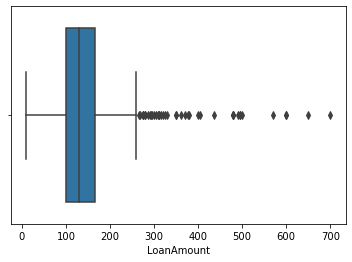

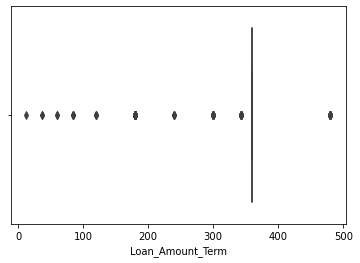

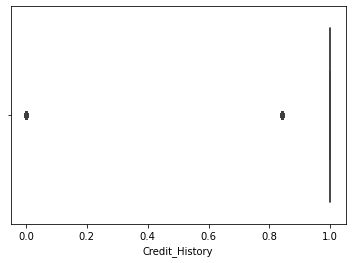

In [12]:
for i in df_con.columns:
    sns.boxplot(df_con[i])
    plt.show()

In [13]:
for i in df_con.columns:
    q1 = df_con[i].quantile(0.25)
    q3 = df_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = df_con.loc[(df_con[i]<uppertail)|(df_con[i]>lowertail) ,i].mean()
    df_con.loc[(df_con[i]>uppertail)|(df_con[i]<lowertail) ,i] = mean

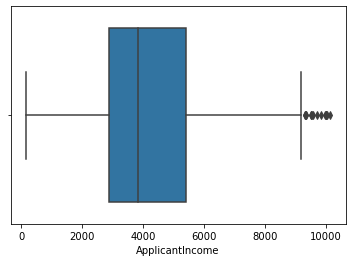

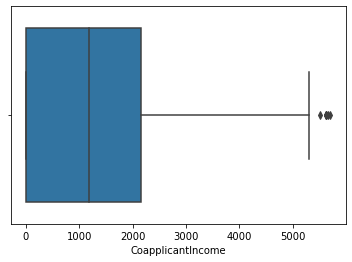

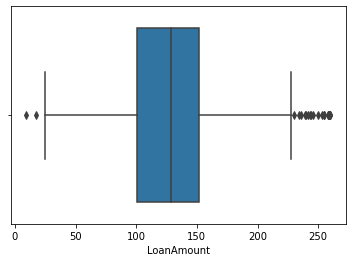

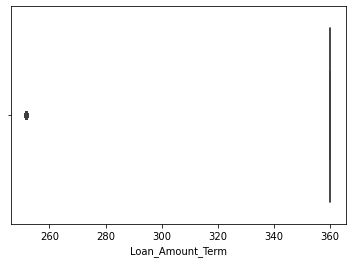

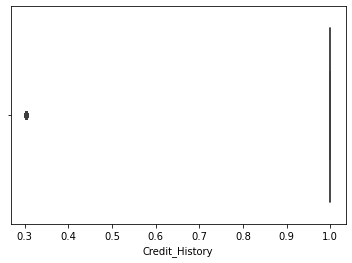

In [14]:
for i in df_con.columns:
    sns.boxplot(df_con[i])
    plt.show()

In [15]:
df_new = df_con.join(df_cat)
df_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.00000,0.0,146.412162,360.000000,1.000000,Male,No,0,Graduate,No,Urban,Y
1,5405.54085,1508.0,128.000000,360.000000,1.000000,Male,Yes,1,Graduate,No,Rural,N
2,3000.00000,0.0,66.000000,360.000000,1.000000,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.00000,2358.0,120.000000,360.000000,1.000000,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.00000,0.0,141.000000,360.000000,1.000000,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.000000,1.000000,Female,No,0,Graduate,No,Rural,Y
610,4106.00000,0.0,40.000000,251.647059,1.000000,Male,Yes,3+,Graduate,No,Rural,Y
611,8072.00000,240.0,253.000000,360.000000,1.000000,Male,Yes,1,Graduate,No,Urban,Y
612,7583.00000,0.0,187.000000,360.000000,1.000000,Male,Yes,2,Graduate,No,Urban,Y


In [16]:
df_new.drop(['Loan_Status'],axis=1,inplace=True)

# Preprocessing

In [17]:
x = preprocessing(df_new)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.570528,0.000000,0.547459,1.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.526133,0.264515,0.474104,1.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0.285314,0.000000,0.227092,1.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.243568,0.413612,0.442231,1.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.585644,0.000000,0.525896,1.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.275303,0.000000,0.247012,1.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0.396036,0.000000,0.123506,0.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0.793072,0.042098,0.972112,1.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.744119,0.000000,0.709163,1.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [18]:
x.shape

(614, 20)

In [19]:
y1 = df_cat[['Loan_Status']]
y1

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [20]:
le = LabelEncoder()
y = le.fit_transform(y1)

In [21]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

# Splitting the Data

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)

# Model Instantiate

In [23]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

# Model Evaluation

In [24]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('Confusion matrix: \n',confusionmatrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification report:\n',Classification_report)

Accuracy: 0.7532467532467533
Confusion matrix: 
 [[23 25]
 [13 93]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.48      0.55        48
           1       0.79      0.88      0.83       106

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [25]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.7739130434782608
Confusion matrix: 
 [[ 68  76]
 [ 28 288]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       144
           1       0.79      0.91      0.85       316

    accuracy                           0.77       460
   macro avg       0.75      0.69      0.71       460
weighted avg       0.77      0.77      0.76       460



# Testing Dataset

In [26]:
df1 = pd.read_csv('testing_set.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Drop Unnecessary Column

In [27]:
df2 = df1.drop(['Loan_ID'],axis=1)
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Handling Missing Value Treatment

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [29]:
df2.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
df2['Gender'].fillna(df2['Gender'].mode()[0],inplace=True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0],inplace=True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0],inplace=True)

df2['LoanAmount'].fillna(df2['LoanAmount'].mean(),inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean(),inplace=True)
df2['Credit_History'].fillna(df2['Credit_History'].mean(),inplace=True)

In [31]:
df2.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# EDA

In [32]:
cat1 = []
con1 = []
for i in df2.columns:
    if(df2[i].dtypes == "object"):
        cat1.append(i)
    else:
        con1.append(i)

In [33]:
df2_cat = df2[cat1]
df2_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [34]:
df2_con = df2[con1]
df2_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.000000
1,3076,1500,126.0,360.0,1.000000
2,5000,1800,208.0,360.0,1.000000
3,2340,2546,100.0,360.0,0.825444
4,3276,0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000
363,4158,709,115.0,360.0,1.000000
364,3250,1993,126.0,360.0,0.825444
365,5000,2393,158.0,360.0,1.000000


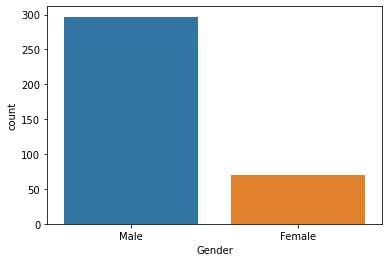

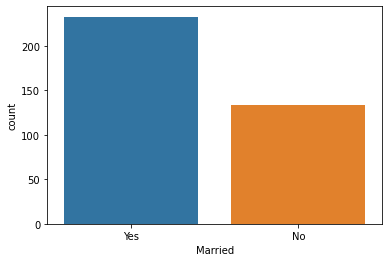

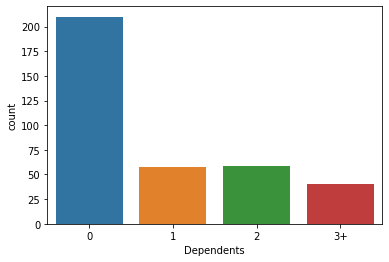

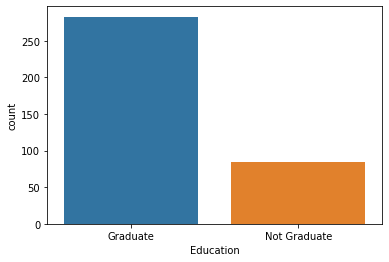

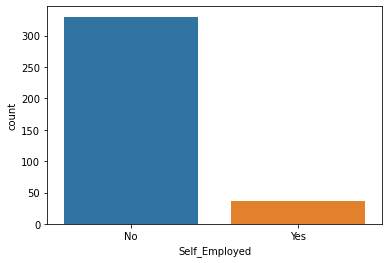

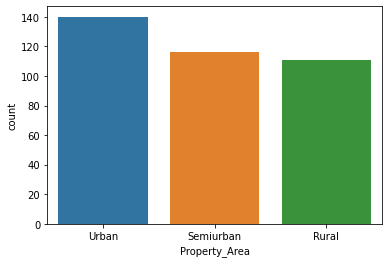

In [35]:
for i in df2_cat.columns:
    sns.countplot(df2_cat[i])
    plt.show()

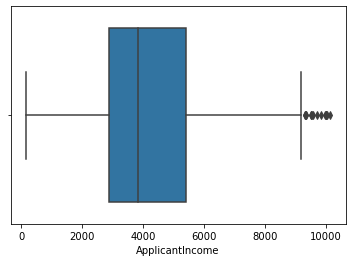

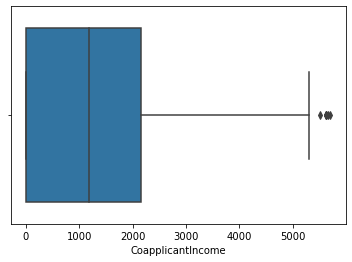

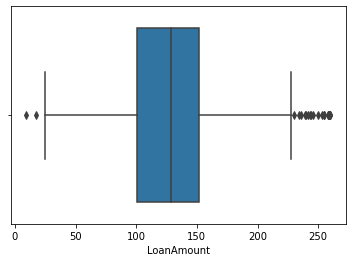

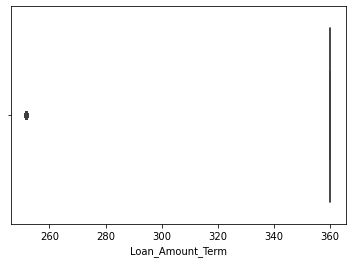

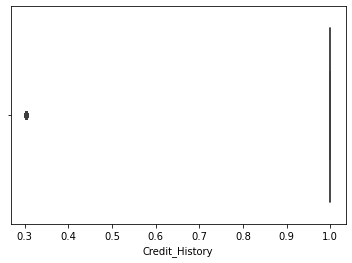

In [36]:
for i in df_con.columns:
    sns.boxplot(df_con[i])
    plt.show()

In [37]:
for i in df2_con.columns:
    q1 = df2_con[i].quantile(0.25)
    q3 = df2_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = df2_con.loc[(df2_con[i]<uppertail)|(df2_con[i]>lowertail) ,i].mean()
    df2_con.loc[(df2_con[i]>uppertail)|(df2_con[i]<lowertail) ,i] = mean

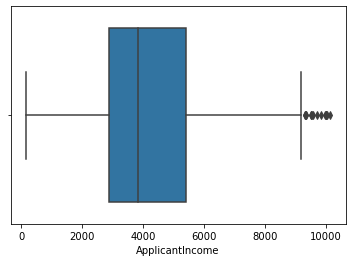

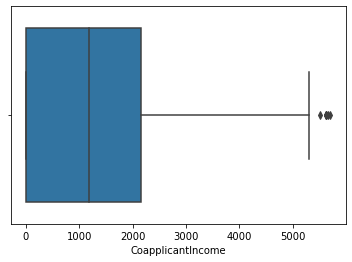

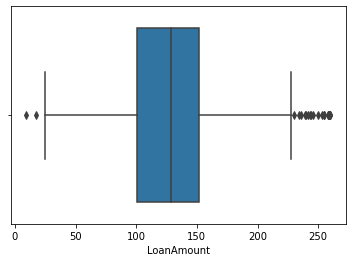

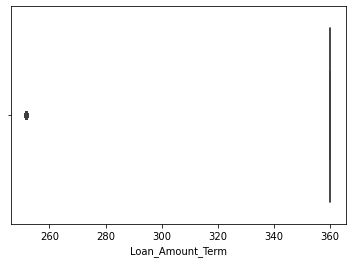

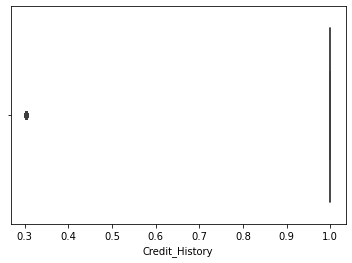

In [38]:
for i in df_con.columns:
    sns.boxplot(df_con[i])
    plt.show()

In [39]:
x1 = df2_cat.join(df2_con)
x1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,Yes,0,Graduate,No,Urban,5720.000000,0.0,110.0,360.000000,1.000000
1,Male,Yes,1,Graduate,No,Urban,3076.000000,1500.0,126.0,360.000000,1.000000
2,Male,Yes,2,Graduate,No,Urban,5000.000000,1800.0,208.0,360.000000,1.000000
3,Male,Yes,2,Graduate,No,Urban,2340.000000,2546.0,100.0,360.000000,0.272021
4,Male,No,0,Not Graduate,No,Urban,3276.000000,0.0,78.0,360.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban,4009.000000,1777.0,113.0,360.000000,1.000000
363,Male,Yes,0,Graduate,No,Urban,4158.000000,709.0,115.0,360.000000,1.000000
364,Male,No,0,Graduate,No,Semiurban,3250.000000,1993.0,126.0,360.000000,0.272021
365,Male,Yes,0,Graduate,No,Rural,5000.000000,2393.0,158.0,360.000000,1.000000


# Preprocessing

In [40]:
x = preprocessing(x1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.686345,0.000000,0.386792,1.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0.369090,0.284522,0.462264,1.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.599952,0.341426,0.849057,1.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0.280778,0.482929,0.339623,1.0,0.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0.393089,0.000000,0.235849,1.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.481042,0.337064,0.400943,1.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0.498920,0.134484,0.410377,1.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0.389969,0.378035,0.462264,1.0,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.599952,0.453907,0.613208,1.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# Fit Model for Testing

In [41]:
Predict = log_model.predict(x)
Predict

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [42]:
Final = le.inverse_transform(Predict)
Final1 = pd.DataFrame(Final,columns=['Loan_Status'])
Final1

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,Y
...,...
362,Y
363,Y
364,N
365,Y


# Submit in Excel File

In [43]:
Final = df1[['Loan_ID']].join(Final1)
Final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [44]:
# Final.to_csv("Submission Loan Status.csv")

### 2.Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

## Import Library

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
cluster = pd.read_csv('testing_set.csv')
cluster.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Drop Unnecessary Column

In [47]:
cluster_df = cluster.drop(['Loan_ID'],axis=1)
cluster_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Missing Value Treatment

In [48]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [49]:
cluster_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
cluster_df['Gender'].fillna(cluster_df['Gender'].mode()[0],inplace=True)
cluster_df['Dependents'].fillna(cluster_df['Dependents'].mode()[0],inplace=True)
cluster_df['Self_Employed'].fillna(cluster_df['Self_Employed'].mode()[0],inplace=True)

cluster_df['LoanAmount'].fillna(cluster_df['LoanAmount'].mean(),inplace=True)
cluster_df['Loan_Amount_Term'].fillna(cluster_df['Loan_Amount_Term'].mean(),inplace=True)
cluster_df['Credit_History'].fillna(cluster_df['Credit_History'].mean(),inplace=True)

In [51]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [52]:
cluster_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Exploratory Data Analysis

In [53]:
cl_cat = []
cl_con = []
for i in cluster_df.columns:
    if (cluster_df[i].dtypes=="object"):
        cl_cat.append(i)
    else:
        cl_con.append(i)

In [54]:
cat_df = cluster_df[cl_cat]
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban


In [55]:
con_df = cluster_df[cl_con]
con_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.000000
1,3076,1500,126.0,360.0,1.000000
2,5000,1800,208.0,360.0,1.000000
3,2340,2546,100.0,360.0,0.825444
4,3276,0,78.0,360.0,1.000000


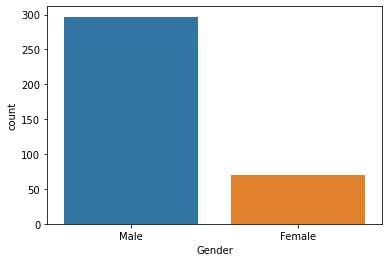

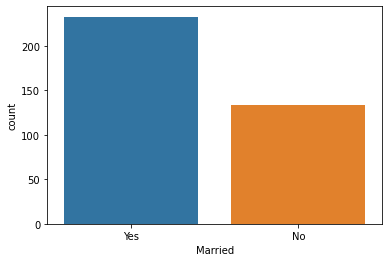

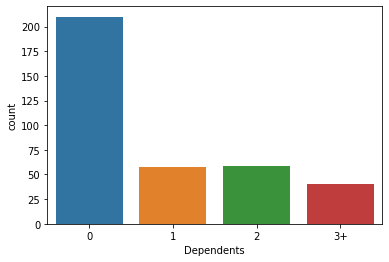

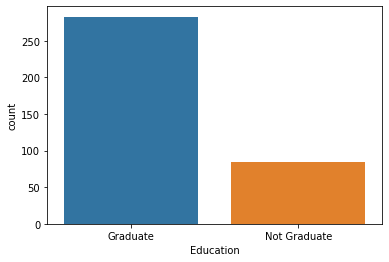

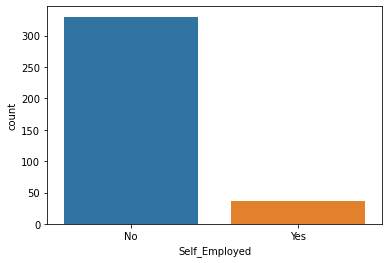

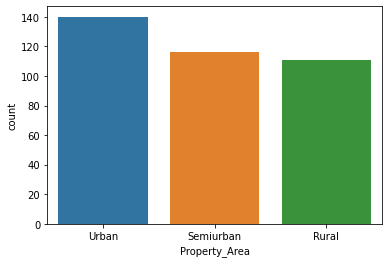

In [56]:
for i in cat_df.columns:
    sns.countplot(cat_df[i])
    plt.show()

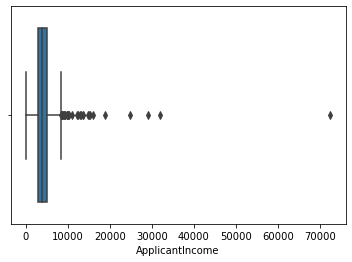

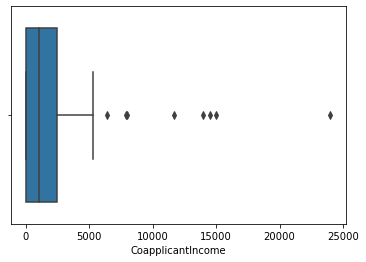

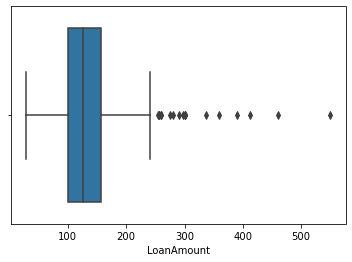

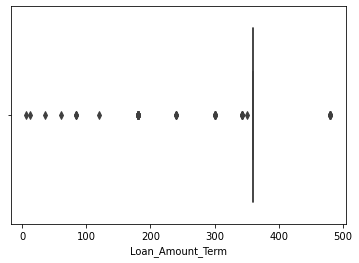

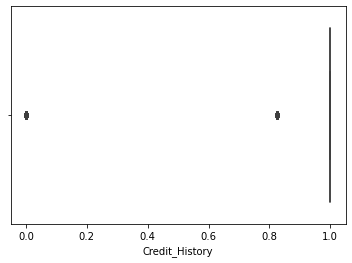

In [57]:
for i in con_df.columns:
    sns.boxplot(con_df[i])
    plt.show()

In [58]:
for i in con_df.columns:
    q1 = con_df[i].quantile(0.25)
    q3 = con_df[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = con_df.loc[(con_df[i]<uppertail)|(con_df[i]>lowertail) ,i].mean()
    con_df.loc[(con_df[i]>uppertail)|(con_df[i]<lowertail) ,i] = mean

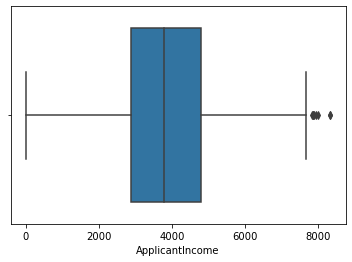

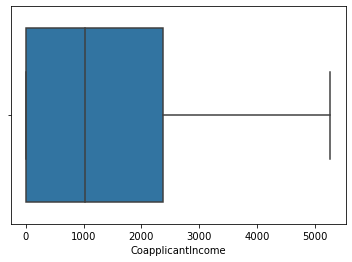

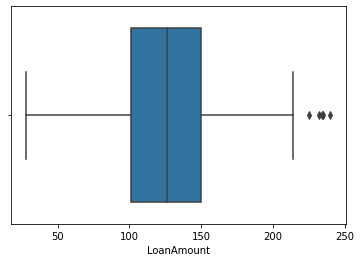

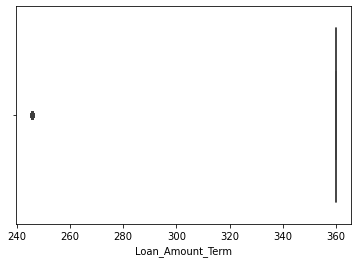

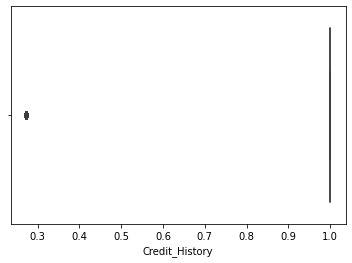

In [59]:
for i in con_df.columns:
    sns.boxplot(con_df[i])
    plt.show()

## Preprocessing

In [60]:
cat_df1 = pd.get_dummies(cat_df)
cat_df1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [61]:
ss = StandardScaler()
std_scaler = ss.fit_transform(con_df)

In [62]:
con_df1 = pd.DataFrame(std_scaler,columns=con_df.columns)
con_df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.193167,-0.921930,-0.426048,0.42434,0.561616
1,-0.568828,0.119985,-0.022803,0.42434,0.561616
2,0.713350,0.328367,2.043830,0.42434,0.561616
3,-1.059308,0.846546,-0.678077,0.42434,-1.780577
4,-0.435546,-0.921930,-1.232539,0.42434,0.561616


In [63]:
x = cat_df1.join(con_df1)
x

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1.193167,-0.921930,-0.426048,0.424340,0.561616
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,-0.568828,0.119985,-0.022803,0.424340,0.561616
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.713350,0.328367,2.043830,0.424340,0.561616
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,-1.059308,0.846546,-0.678077,0.424340,-1.780577
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.435546,-0.921930,-1.232539,0.424340,0.561616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0.052935,0.312391,-0.350440,0.424340,0.561616
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0.152231,-0.429452,-0.300034,0.424340,0.561616
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.452872,0.462427,-0.022803,0.424340,-1.780577
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0.713350,0.740271,0.783688,0.424340,0.561616


## Model Building

In [64]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(x)

KMeans(n_clusters=2)

### Within cluster sum of squares(WCSS)

In [65]:
kmeans_model.inertia_

2398.849034733864

## Predictions

In [66]:
y = kmeans_model.fit_predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### cluster-0 points(No)

In [67]:
index_0 = np.where(y==0)
index_0

(array([  8,  12,  19,  21,  29,  36,  45,  48,  53,  57,  59,  72,  82,
         84,  85, 101, 103, 117, 128, 129, 134, 141, 144, 145, 155, 157,
        164, 173, 184, 190, 200, 214, 215, 216, 222, 223, 232, 239, 245,
        249, 250, 251, 266, 277, 295, 312, 314, 315, 322, 325, 338, 340,
        342, 349, 354, 366], dtype=int64),)

In [68]:
cluster_0 = x.iloc[index_0]
cluster_0

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
8,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.583799,-0.921930,0.232568,-2.356602,0.561616
12,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0.157562,-0.921930,-2.190247,-2.356602,-1.780577
19,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-1.752377,1.488365,-0.678077,-2.356602,0.561616
21,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,-1.230576,-0.921930,-2.492681,-2.356602,0.561616
29,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,-0.658127,0.732630,-0.048006,-2.356602,0.561616
36,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,2.279420,1.876652,1.464165,-2.356602,0.561616
45,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0.220205,1.787047,1.464165,-2.356602,-1.780577
48,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1.907562,1.396677,1.514571,-2.356602,0.561616
53,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.124241,-0.227320,-2.442276,-2.356602,0.561616
57,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,-0.210964,1.536293,0.178820,-2.356602,0.561616


### Cluster-1 points(Yes)

In [69]:
index_1 = np.where(y==1)
index_1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  13,  14,
         15,  16,  17,  18,  20,  22,  23,  24,  25,  26,  27,  28,  30,
         31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,  43,  44,
         46,  47,  49,  50,  51,  52,  54,  55,  56,  58,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  83,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 102, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 130, 131, 132, 133, 135, 136, 137,
        138, 139, 140, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 156, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169,
        170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 201, 202, 203, 204, 205, 206, 207, 208

In [70]:
cluster_1 = x.iloc[index_1]
cluster_1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1.193167,-0.921930,-0.426048,0.42434,0.561616
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,-0.568828,0.119985,-0.022803,0.42434,0.561616
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.713350,0.328367,2.043830,0.42434,0.561616
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,-1.059308,0.846546,-0.678077,0.42434,-1.780577
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.435546,-0.921930,-1.232539,0.42434,0.561616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,-1.106623,0.583289,-0.703279,0.42434,0.561616
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0.052935,0.312391,-0.350440,0.42434,0.561616
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0.152231,-0.429452,-0.300034,0.42434,0.561616
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.452872,0.462427,-0.022803,0.42434,-1.780577


## Elbow Method

In [71]:
WCSS_list = []
for k in range(1,10):
    kmeans_model = KMeans(n_clusters=k)  
    kmeans_model.fit(x)
    WCSS = kmeans_model.inertia_
    WCSS_list.append(WCSS)
    print('K >>',k,'WCSS>>',WCSS)

K >> 1 WCSS>> 2781.7138964577653
K >> 2 WCSS>> 2398.849034733864
K >> 3 WCSS>> 2074.2579486888653
K >> 4 WCSS>> 1838.5985435306854
K >> 5 WCSS>> 1683.760335625226
K >> 6 WCSS>> 1603.7329037400457
K >> 7 WCSS>> 1527.0749529350032
K >> 8 WCSS>> 1465.5872556117845
K >> 9 WCSS>> 1422.0852971446086


Text(0.5, 1.0, 'Elbow method graph')

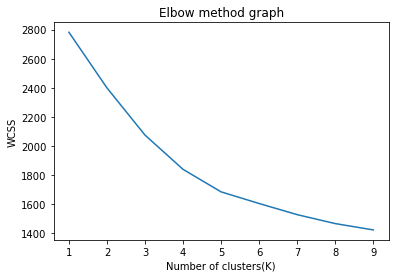

In [72]:
k = range(1,10)
plt.plot(k,WCSS_list)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow method graph')

In [73]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(x)

KMeans(n_clusters=5)

Text(0.5, 1.0, 'Elbow method graph')

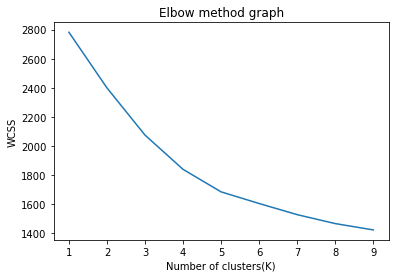

In [74]:
k = range(1,10)
plt.plot(k,WCSS_list)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow method graph')

In [75]:
y = kmeans_model.fit_predict(x)
y

array([4, 1, 4, 0, 2, 1, 2, 0, 3, 1, 2, 1, 3, 0, 2, 4, 1, 2, 4, 3, 2, 3,
       2, 2, 1, 0, 0, 4, 0, 3, 2, 4, 1, 1, 2, 0, 3, 1, 4, 1, 4, 2, 2, 4,
       2, 3, 1, 2, 3, 4, 1, 2, 1, 3, 2, 0, 2, 3, 0, 3, 2, 4, 4, 0, 2, 1,
       0, 0, 4, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 4, 0, 4, 3, 4, 3, 3, 1, 2,
       2, 4, 0, 4, 1, 2, 0, 4, 1, 1, 2, 4, 2, 3, 2, 3, 0, 1, 0, 4, 4, 4,
       2, 2, 2, 1, 1, 0, 1, 3, 0, 0, 2, 1, 1, 0, 0, 2, 0, 4, 3, 3, 2, 2,
       2, 2, 3, 2, 4, 1, 2, 0, 0, 3, 0, 0, 3, 3, 2, 0, 4, 4, 1, 2, 4, 0,
       2, 3, 1, 3, 4, 4, 1, 0, 4, 2, 3, 0, 0, 1, 0, 2, 2, 4, 4, 3, 0, 1,
       1, 0, 4, 0, 1, 1, 2, 1, 3, 0, 4, 4, 4, 4, 3, 2, 0, 0, 1, 4, 0, 2,
       0, 2, 3, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 4, 4, 3, 3, 3, 4, 1, 1,
       0, 1, 3, 3, 0, 2, 2, 1, 1, 0, 4, 1, 3, 4, 2, 0, 0, 4, 2, 3, 2, 0,
       2, 0, 2, 3, 4, 4, 2, 3, 3, 3, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 4,
       1, 0, 3, 1, 0, 2, 2, 1, 4, 0, 0, 2, 4, 3, 0, 4, 1, 4, 0, 2, 4, 4,
       0, 1, 4, 4, 1, 1, 2, 0, 1, 3, 4, 2, 2, 4, 4,